In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import torch
import torch.nn as nn

In [2]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [3]:
train_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
test_df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
y_train_val = train_df.label.to_numpy()
y_train_val

array([1, 0, 1, ..., 7, 6, 9])

In [6]:
X_train_val = train_df.drop("label", axis=1).to_numpy()
X_train_val.shape

(42000, 784)

In [7]:
X_test = test_df.to_numpy()
X_test.shape

(28000, 784)

In [8]:
X_train_val = X_train_val / 255.0
X_test = X_test / 255.0

In [9]:
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.10, random_state=42)

In [10]:
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape)

(37800, 784) (37800,)
(4200, 784) (4200,)
(28000, 784)


In [11]:
X_train = torch.tensor(X_train, dtype=torch.float32)
X_val = torch.tensor(X_val, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_val = torch.tensor(y_val)
y_train = torch.tensor(y_train)

In [12]:
class NeuralNet(nn.Module):

    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.layers = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10)
        )

    def forward(self, x):
        x = self.flatten(x)
        x = self.layers(x)
        return x

In [13]:
model = NeuralNet()
loss_function = nn.CrossEntropyLoss()

In [18]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [15]:
loss_track = []

In [42]:
epochs = 20

for i in range(epochs):

    # forward pass
    y_pred = model.forward(X_train)
    loss = loss_function(y_pred, y_train)

    # loss tracing
    loss_track.append(loss)

    # backward pass
    optimizer.zero_grad()
    loss.backward()

    # update
    optimizer.step()

    if i % 2 == 0:
        print(f"epoch: {i}, loss={loss.item()}")

epoch: 0, loss=0.013795379549264908
epoch: 2, loss=0.012396545149385929
epoch: 4, loss=0.011123104020953178
epoch: 6, loss=0.009965402074158192
epoch: 8, loss=0.008927863091230392
epoch: 10, loss=0.007996584288775921
epoch: 12, loss=0.007161238696426153
epoch: 14, loss=0.006410005036741495
epoch: 16, loss=0.005739910993725061
epoch: 18, loss=0.005145212635397911


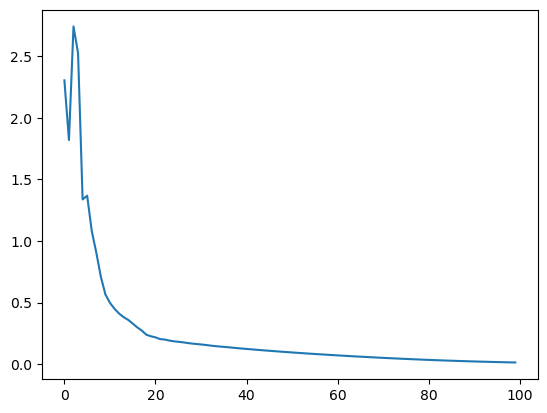

In [32]:
plt.plot([t.detach().numpy() for t in loss_track])

In [33]:
predicated_val_values = torch.argmax(model(X_val), 1)
print(predicated_val_values)
print(y_val)

tensor([8, 1, 9,  ..., 7, 7, 5])
tensor([8, 1, 9,  ..., 7, 7, 5])


In [34]:
val_score = accuracy_score(y_val, predicated_val_values)
print("validation accuracy is %.2f%%" % (val_score*100))

validation accuracy is 97.43%


In [35]:
predicated_test_values = torch.argmax(model(X_test), 1)
print(predicated_test_values)

tensor([2, 0, 9,  ..., 3, 9, 2])


In [41]:
ans_df = pd.DataFrame({"ImageId": torch.arange(1, test_df.shape[0]+1), "Label": predicated_test_values})
ans_df.to_csv("outputs/ans1.csv", index=False)